# Import Modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use("default")

# Stationary States

In [2]:
# Define function which gives the energy eigenstates
def psi_n(L, x, n):
    """
    Returns the n'th stationary state of the infinite well.
    """
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L )

# Define functions which calculate the expectation value
def x_exp(psi, x):
    """
    Estimates the expectation value of the position.
    """
    dx = np.abs(x[1] - x[0])
    psi2 = np.abs(psi) ** 2
    integrand = x * psi2
    return integrand.sum()*dx

def p_exp(psi, x):
    """
    Estimates the expectation value of the momentum.
    """
    dx = np.abs(x[1] - x[0])
    dpsi_dx = (psi[1:] - psi[:-1]) / dx
    integrand = -1j * np.conj(psi[:-1]) * dpsi_dx
    return (integrand[1:-1].sum() + 0.5*(integrand[0] + integrand[-1]))*dx

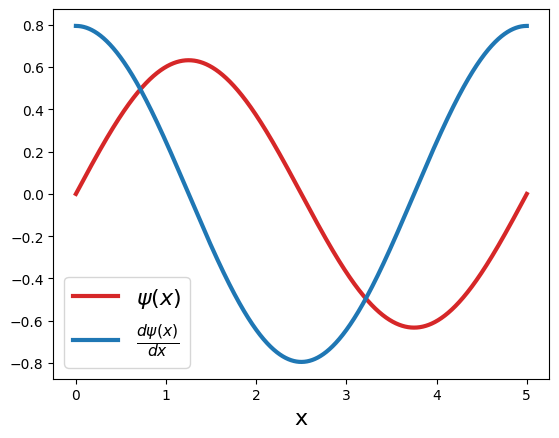

Expectation value of position:  2.5
Expectation value of momentum:  3.947802279534417e-05j


In [3]:
# Set parameters 
L = 5                         
n = 2

# Accuracy of numerical differentiation and integration depend
# on the size of dx 
x = np.linspace(0, L, int(1e5))   
dx = x[1] - x[0]

psi = psi_n(L=L, x=x, n=n)
plt.plot(x, psi, label=r"$\psi(x)$", lw=3, color="tab:red")

dpsi_dx = (psi[1:] - psi[:-1]) / dx
plt.plot(x[1:], dpsi_dx, label=r"$\frac{d\psi(x)}{dx}$", lw=3, color="tab:blue")

plt.xlabel("x", fontsize=16)
plt.legend(fontsize=16)
plt.show()

print("Expectation value of position: ", x_exp(psi, x)) 
print("Expectation value of momentum: ", p_exp(psi, x))

In [4]:
from ipywidgets.widgets import interact, Layout

xmin = -1
ymin = -0.5
ymax = 1.25
Lmax = 5

def plot_stationary_state(L, n):
    
    plt.figure(figsize=(12, 6))
    
    x = np.linspace(0, L, 500)
    plt.plot(x, np.abs(psi_n(L, x, n))**2, 
             lw=3, 
             color="tab:blue",
             label=r'$|\psi_{}(x)|^2$'.format(str(n))) 
        
    plt.ylim(ymin, ymax)
    plt.xlim(xmin, Lmax + 1)
    plt.axvspan(L, Lmax + 1, fc='lightgray')
    plt.axvspan(-Lmax, 0, fc='lightgray')
    plt.axhspan(0, ymin, fc='lightgray')
    plt.xlabel(r'$x$', fontsize=20)
    plt.legend(fontsize=20, 
           bbox_to_anchor=(0.6, 1.2))
    plt.show()

In [5]:
interact(plot_stationary_state, L=(1.85, Lmax, 0.25), n=(1, 10, 1))
plt.show()

interactive(children=(FloatSlider(value=3.35, description='L', max=5.0, min=1.85, step=0.25), IntSlider(value=…

# General States

In [6]:
def general_state(cn_dict, x, L):
    """
    Gives a general state as a linear combination of 
    stationary states. Coefficients should be given in cn_dict.
    """
    norm_factor = sum([cn**2 for cn in cn_dict.values()])
    Psi = np.zeros(shape=x.shape)
    
    for n, cn in cn_dict.items():
        normd_coef = cn / np.sqrt(norm_factor)
        Psi += normd_coef * psi_n(L, x, n)
        
    return Psi

In [7]:
def plot_general_state(cn_dict, L):
    
    plt.figure(figsize=(12, 6))
    x = np.linspace(0, L, 500)
    Psi = general_state(cn_dict, x, L)
    norm_factor = sum([cn**2 for cn in cn_dict.values()])
    
    T = r"$\psi(x) = $"
    for i, (n, cn) in enumerate(cn_dict.items()):
        if cn != 0:
            T += r'$ + \frac{{{}}}{{\sqrt{{{}}}}} \psi_{{{}}}(x)$'.format(cn, norm_factor, n)

    plt.plot(x, np.abs(Psi)**2, lw=3, color="tab:blue", label = r"$|\psi(x)|^2$") 
        
    plt.ylim(ymin, ymax)
    plt.xlim(xmin, Lmax + 1)
    plt.axvspan(L, Lmax + 1, fc='lightgray')
    plt.axvspan(-Lmax, 0, fc='lightgray')
    plt.axhspan(0, ymin, fc='lightgray')
    plt.xlabel(r'$x$', fontsize=20)
    plt.title(T, fontsize=20)
    plt.legend(fontsize=20)
    plt.show()

<IPython.core.display.Javascript object>


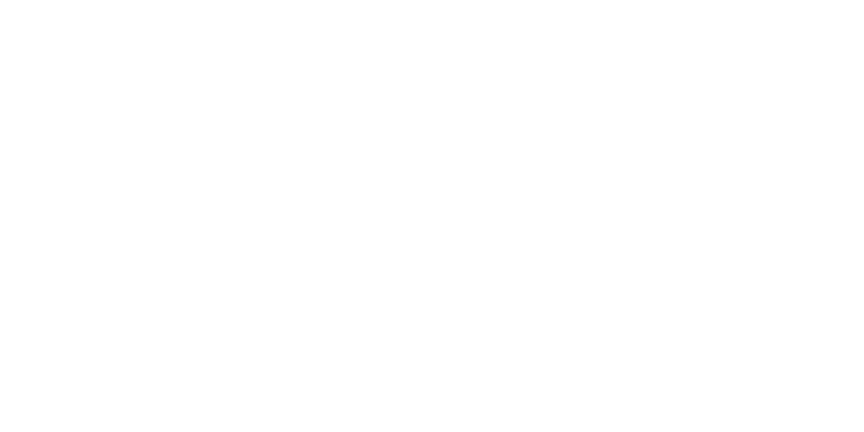

<IPython.core.display.Javascript object>


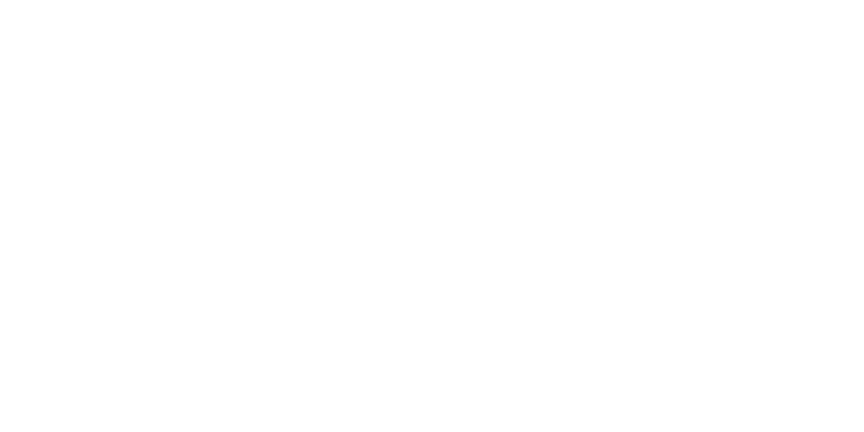

In [49]:
L = 4
x = np.linspace(0, L, 100)
xmin = -1
ymin = -0.25
ymax = 1.5
Lmax = L

cn_dict = {1: -1, 
           2: 3, 
           4: 0,
           25: 1}

plot_general_state(cn_dict, L)

# Time Dependence

In [8]:
def psi_t(n, x, L, t):
    En = n**2 * np.pi**2 / (2 * L**2)
    return np.sqrt(2/L) * np.sin(n * np.pi * x / L) * np.exp(-1j * En * t )

In [9]:
def general_state_t(cn_dict, x, L, t):
    
    norm_factor = sum([cn**2 for cn in cn_dict.values()])
    
    Psi = np.zeros(shape=x.shape, dtype=np.complex128)
    for n, cn in cn_dict.items():
        normd_coef = cn / np.sqrt(norm_factor)
        Psi += complex(normd_coef) * psi_t(n, x, L, t)
        
    return Psi

In [22]:
def plot_general_state_t(cn_dict, L, x, t):
    
    plt.figure(figsize=(12, 6))
    Psi = general_state_t(cn_dict, x, L, t)
    
    norm_factor = sum([cn**2 for cn in cn_dict.values()])
    T = r"$\psi(x, t={}) = $".format(t)
    for i, (n, cn) in enumerate(cn_dict.items()):
        if cn != 0:
            T += r'$ + \frac{{{}}}{{\sqrt{{{}}}}} \psi_{{{}}}(x,t)$'.format(cn, norm_factor, n)

    plt.plot(x, np.abs(Psi)**2, lw=3, color="tab:blue", label = r"$|\psi(x)|^2$") 
        
    plt.ylim(ymin, ymax)
    plt.xlim(xmin, Lmax + 1)
    plt.axvspan(L, Lmax + 1, fc='lightgray')
    plt.axvspan(-Lmax, 0, fc='lightgray')
    plt.axhspan(0, ymin, fc='lightgray')
    plt.xlabel(r'$x$', fontsize=20)
    plt.title(T, fontsize=20)
    plt.legend(fontsize=20)
    plt.show()

<IPython.core.display.Javascript object>


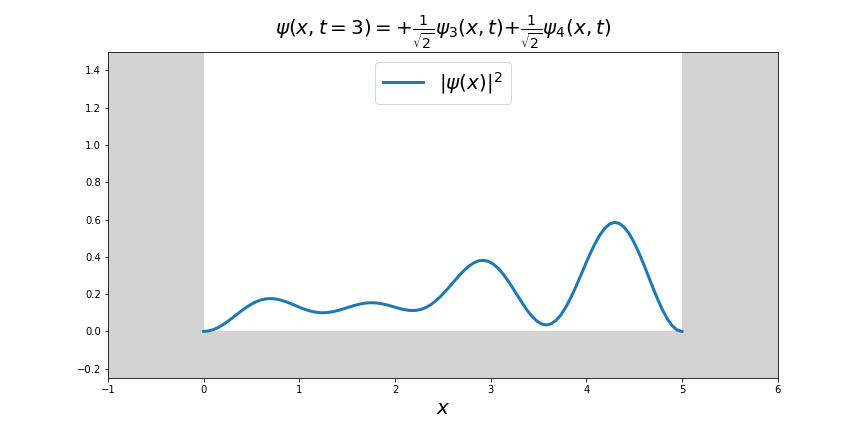

In [23]:
x = np.linspace(0, L, 100)
xmin = -1
ymin = -0.25
ymax = 1.5
Lmax = L

t = 3

cn_dict = {1: 0, 
           2: 0, 
           3: 1, 
           4: 1, 
           5: 0}

plot_general_state_t(cn_dict, L, x, t)

In [13]:
from matplotlib.animation import FuncAnimation

%matplotlib notebook

<IPython.core.display.Javascript object>


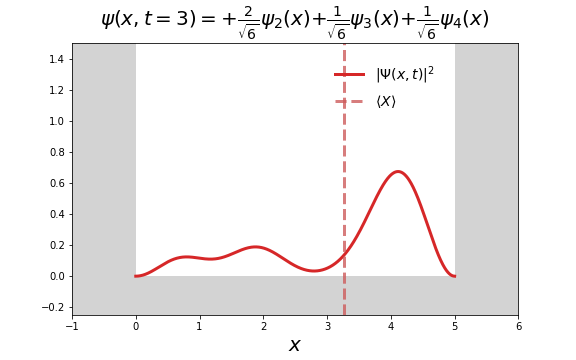

In [21]:
times = np.linspace(0, 20, 1000)
x = np.linspace(0, L, int(1e3))

cn_dict = {1: 0, 
           2: 2, 
           3: 1, 
           4: 1, 
           10: 0,
           50: 0}

Z = np.array([np.abs(general_state_t(cn_dict, x, L, t))**2 for t in times])
dx = np.abs(x[1] - x[0]) 
x_ = [x_exp(general_state_t(cn_dict, x, L, t), x) for t in times]

norm_factor = sum([cn**2 for cn in cn_dict.values()])
T = r"$\psi(x, t={}) = $".format(t)
for i, (n, cn) in enumerate(cn_dict.items()):
    if cn != 0:
        T += r'$ + \frac{{{}}}{{\sqrt{{{}}}}} \psi_{{{}}}(x)$'.format(cn, norm_factor, n)
        
fig, ax = plt.subplots(figsize=(8, 5))
ax.set(xlim=(-1, 5), ylim=(-0.1, 1))
line = ax.plot(x, Z[0, :], color='tab:red', lw=3, label=r"$|\Psi(x,t)|^2$")[0]
vline = ax.axvline(x_[0], color='indianred', alpha=0.8, ls="--", lw=3, label=r"$\langle X \rangle$")

def animate(i):
    line.set_ydata(Z[i, :])
    vline.set_xdata([x_[i], x_[i]])
    norm_factor = sum([cn**2 for cn in cn_dict.values()])
    
ax.set_title(T, fontsize=20)
ax.set_ylim(ymin, ymax)
ax.set_xlim(xmin, Lmax + 1)
ax.axvspan(L, Lmax + 1, fc='lightgray')
ax.axvspan(-Lmax, 0, fc='lightgray')
ax.axhspan(0, ymin, fc='lightgray')
ax.set_xlabel(r'$x$', fontsize=20)
ax.legend(fontsize=14, bbox_to_anchor=(.84, .97), ncol=1, framealpha=0)

anim = FuncAnimation(fig, animate, interval=15, frames=len(times)-1, repeat=True)

plt.show()